# Business task

To build an effective machine learning model to predict whether the breast cancer is benign or malignant.

# Importing packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix,plot_roc_curve,classification_report,accuracy_score,precision_score,f1_score,recall_score

# Load the dataset

In [2]:
df = pd.read_csv('Downloads\\data.csv')

# Dataset overview and statistical summary

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.shape

(569, 33)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


# Data cleaning

In [7]:
#checking for null values
df.isna().sum().sort_values(ascending=False)

Unnamed: 32                569
compactness_se               0
fractal_dimension_worst      0
symmetry_worst               0
concave points_worst         0
concavity_worst              0
compactness_worst            0
smoothness_worst             0
area_worst                   0
perimeter_worst              0
texture_worst                0
radius_worst                 0
fractal_dimension_se         0
symmetry_se                  0
concave points_se            0
concavity_se                 0
id                           0
diagnosis                    0
area_se                      0
perimeter_se                 0
texture_se                   0
radius_se                    0
fractal_dimension_mean       0
symmetry_mean                0
concave points_mean          0
concavity_mean               0
compactness_mean             0
smoothness_mean              0
area_mean                    0
perimeter_mean               0
texture_mean                 0
radius_mean                  0
smoothne

In [8]:
# dropping irelevant columns
df = df.iloc[:,1:-1]

In [9]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
df.columns.sort_values()

Index(['area_mean', 'area_se', 'area_worst', 'compactness_mean',
       'compactness_se', 'compactness_worst', 'concave points_mean',
       'concave points_se', 'concave points_worst', 'concavity_mean',
       'concavity_se', 'concavity_worst', 'diagnosis',
       'fractal_dimension_mean', 'fractal_dimension_se',
       'fractal_dimension_worst', 'perimeter_mean', 'perimeter_se',
       'perimeter_worst', 'radius_mean', 'radius_se', 'radius_worst',
       'smoothness_mean', 'smoothness_se', 'smoothness_worst', 'symmetry_mean',
       'symmetry_se', 'symmetry_worst', 'texture_mean', 'texture_se',
       'texture_worst'],
      dtype='object')

In [11]:
# correcting the column names
df.rename(columns={'concave points_mean':'concave_points_mean','concave points_se':'concave_points_se','concave points_worst':'concave_points_worst'},inplace=True)

In [12]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
# mapping target column data 'M' malignant to 1 and 'B' benign to 0
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})

In [14]:
df['diagnosis'].unique()

array([1, 0], dtype=int64)

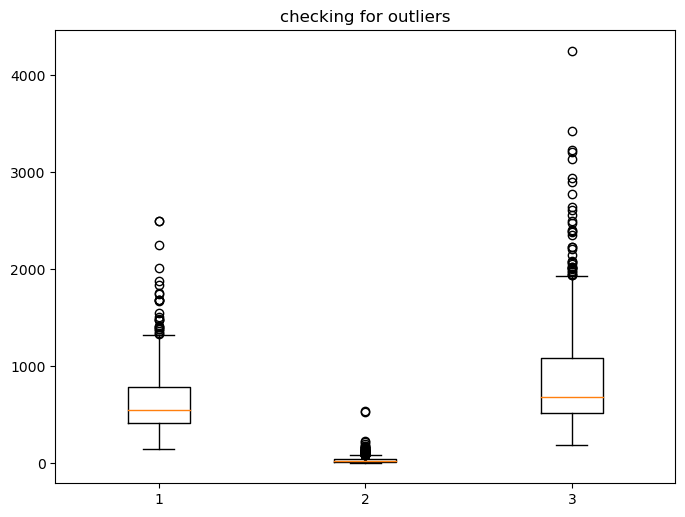

In [15]:
# checking for outliers
plt.figure(figsize=(8,6),dpi=100)
plt.boxplot(df[['area_mean','area_se','area_worst']])
plt.title('checking for outliers');

As there are only 569 observations, will replace outliers with upper_limit values

In [16]:
#creating helper function
def helper_func(n):
    if n>upper_limit:
        return upper_limit
    return n

In [17]:
cols = ['area_mean','area_se','area_worst']

for i in cols:
    perc_75 = df[i].quantile(.75)
    perc_25 = df[i].quantile(.25)
    iqr = perc_75 - perc_25
    upper_limit = perc_75 + 1.5 * iqr
    df[i] = df[i].apply(helper_func)

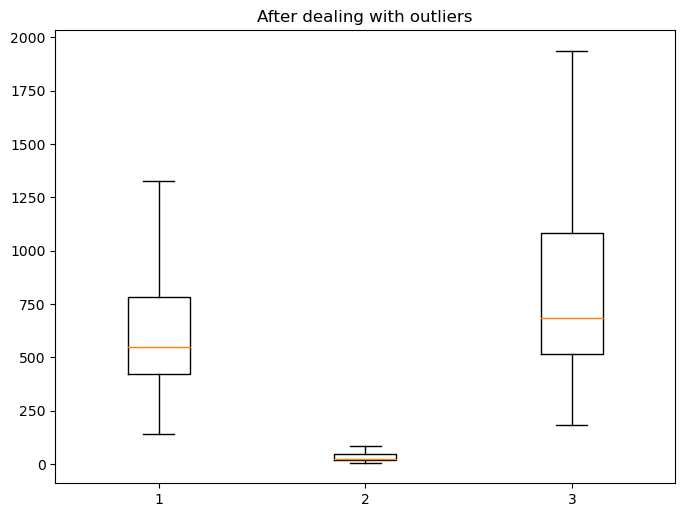

In [18]:
# after dealing for outliers
plt.figure(figsize=(8,6),dpi=100)
plt.boxplot(df[['area_mean','area_se','area_worst']])
plt.title('After dealing with outliers');

# EDA

In [19]:
df['diagnosis'].value_counts(normalize=True)*100

0    62.741652
1    37.258348
Name: diagnosis, dtype: float64

About 62.7% observations are benign and 37.2% are malignant.

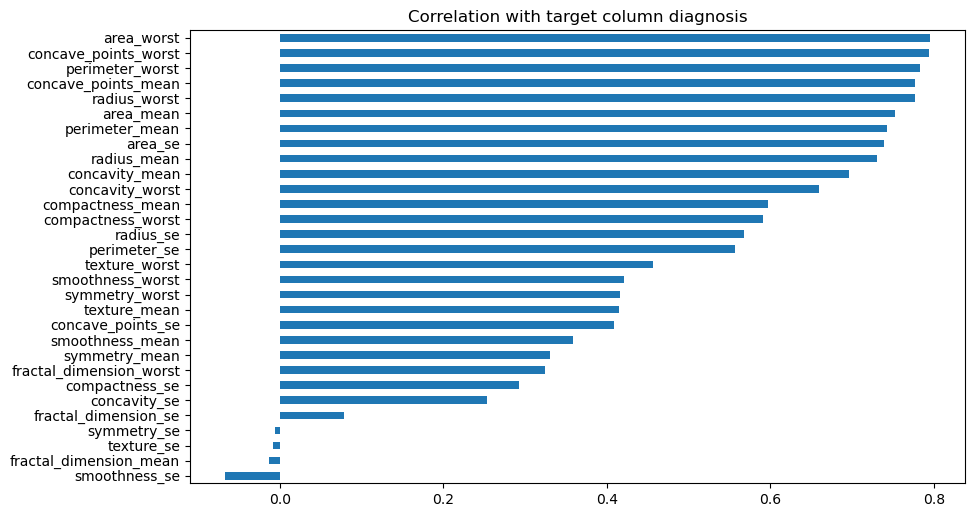

In [20]:
#Understanding the correlation of every feature with target variable
plt.figure(figsize=(10,6),dpi=100)
df.corr()['diagnosis'].sort_values()[:-1].plot(kind='barh')
plt.title('Correlation with target column diagnosis');

area_worst is highly positively correlated, whereas the smoothness_se is negatively correlated.

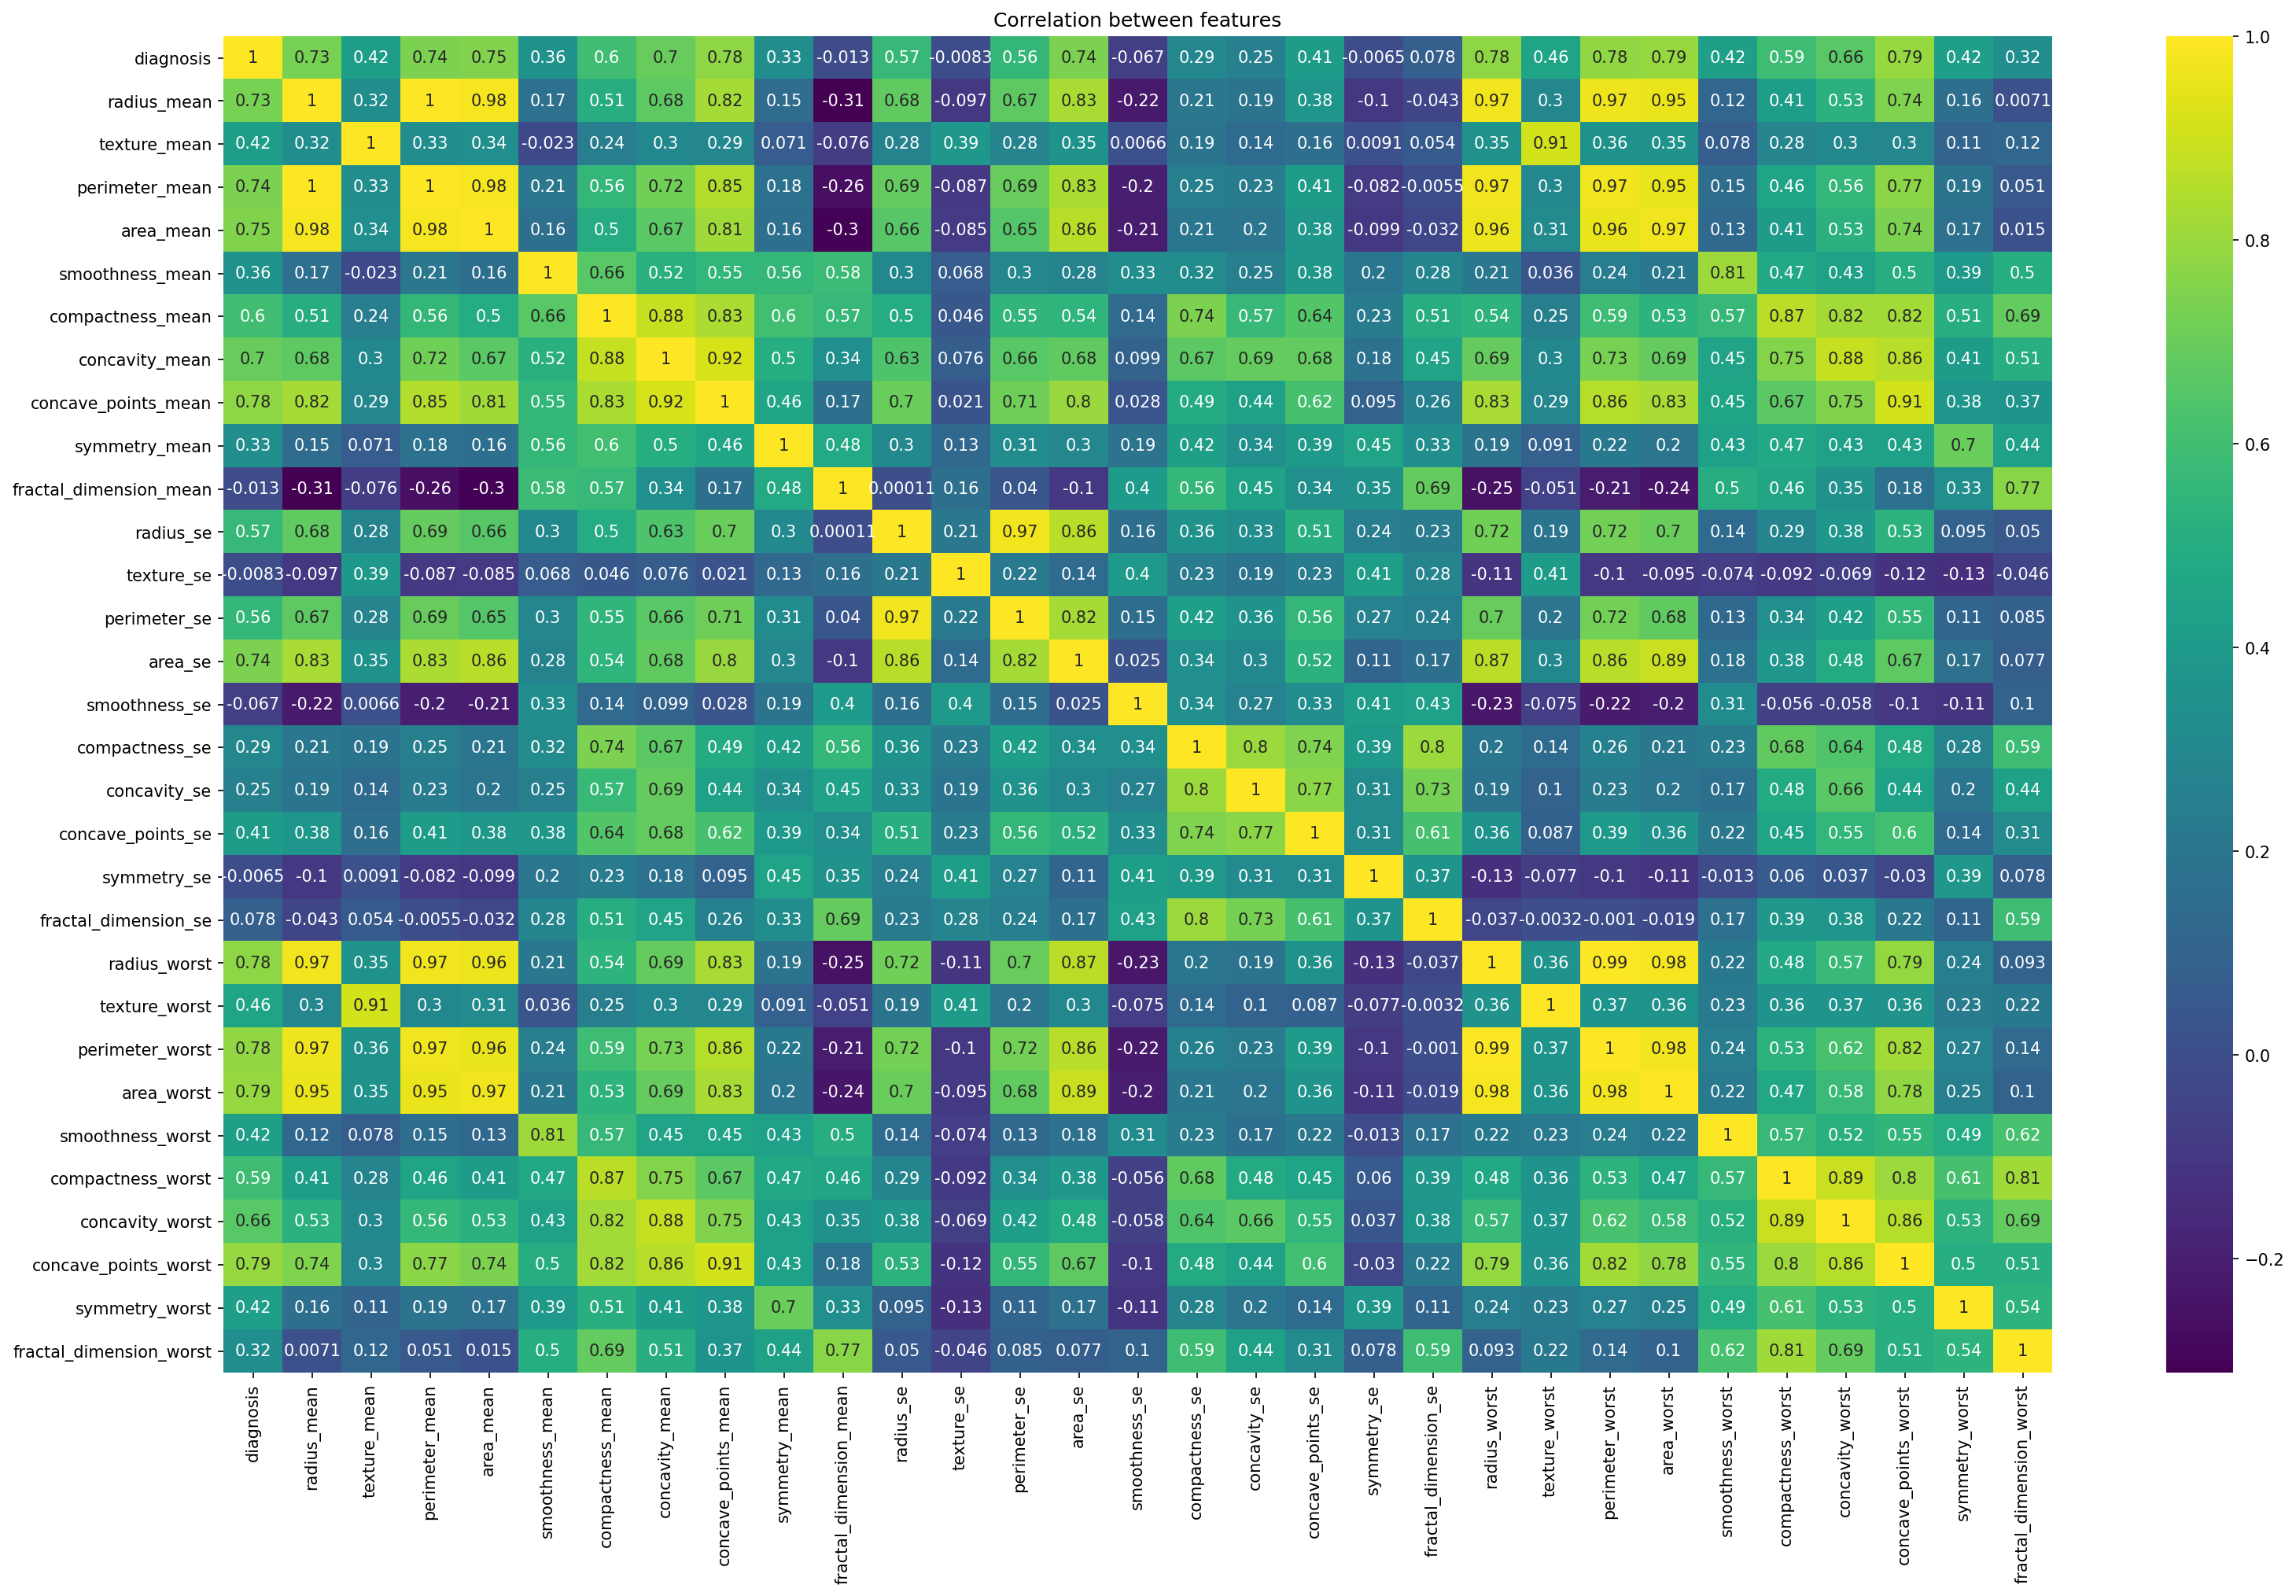

In [21]:
plt.figure(figsize=(25,15),dpi=150)
sns.heatmap(df.corr(),cmap='viridis',annot=True)
plt.title('Correlation between features');

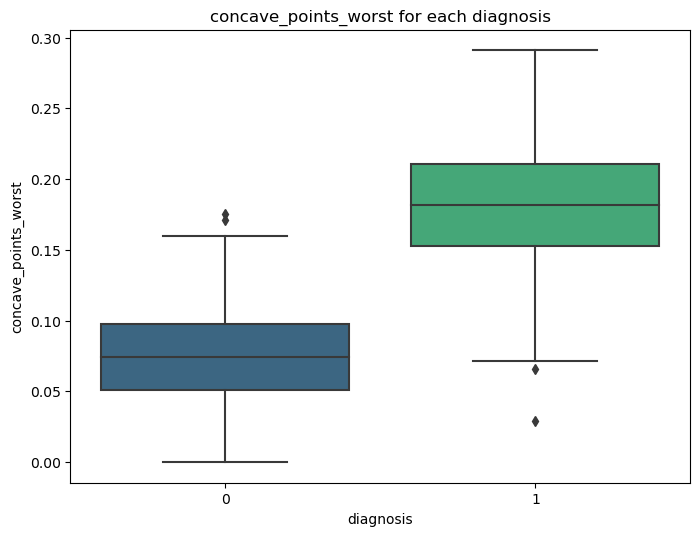

In [22]:
plt.figure(figsize=(8,6),dpi=100)
sns.boxplot(data=df,x='diagnosis',y='concave_points_worst',palette='viridis')
plt.title('concave_points_worst for each diagnosis');

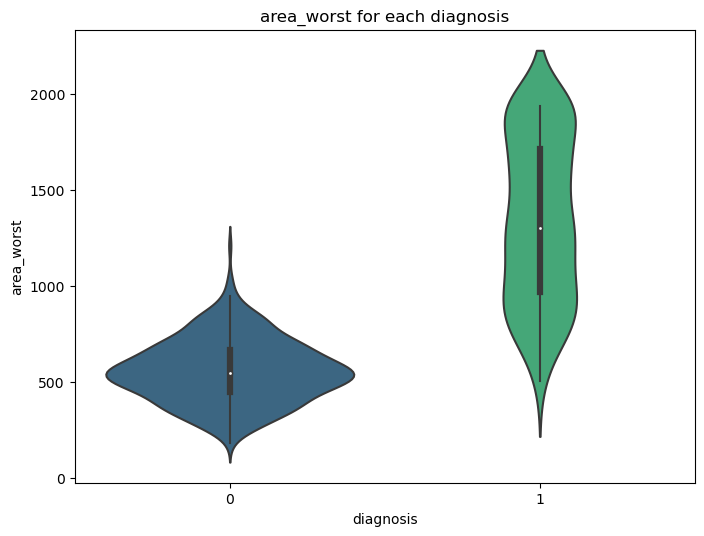

In [23]:
plt.figure(figsize=(8,6),dpi=100)
sns.violinplot(data=df,x='diagnosis',y='area_worst',palette='viridis')
plt.title('area_worst for each diagnosis');

area_worst for most of the benign cancer falls just above 500, whereas for malignant it goes as above as 2000.

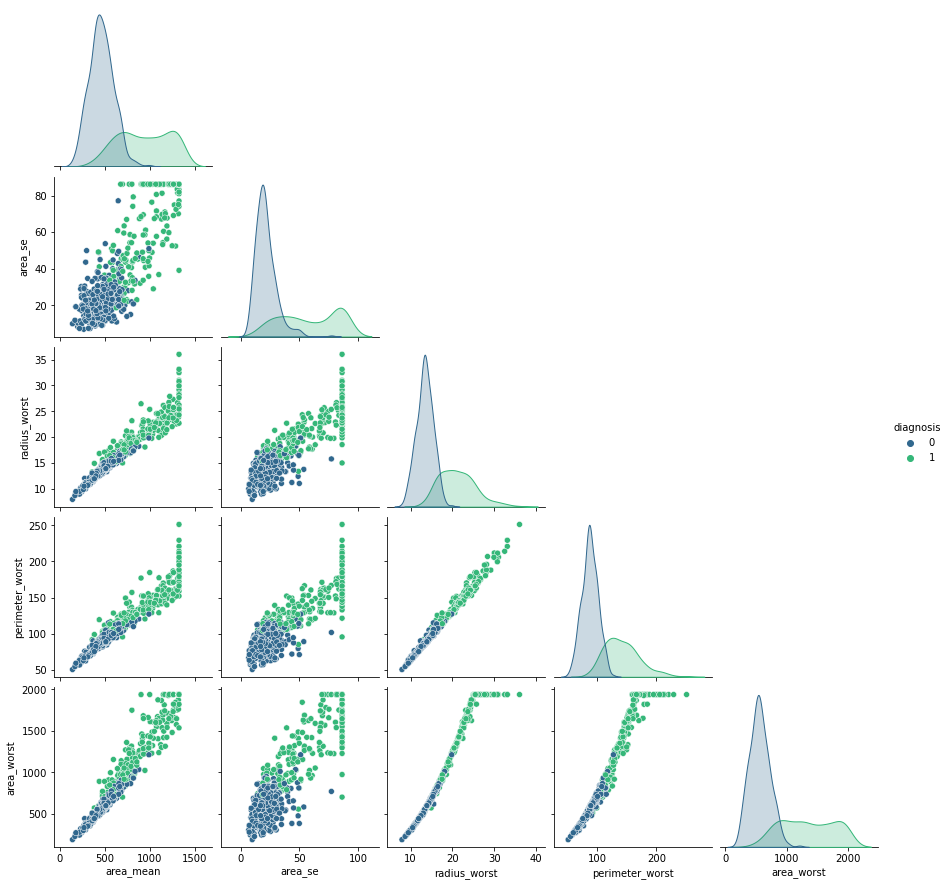

In [24]:
# understanding the relations between variables
sns.pairplot(df[['area_mean','area_se','radius_worst','perimeter_worst','area_worst','diagnosis']],hue='diagnosis',corner=True,palette='viridis');

The higher values of area, radius and perimeter constitute malignant cancer

# Create X,y and perform train - test split

In [25]:
X = df.drop('diagnosis',axis=1)
y=df['diagnosis']

In [26]:
# choosing 15%  as test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)

In [27]:
# using standard scaler to scale the data
scale = StandardScaler()

In [28]:
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

# Creating ML models

# Logistic regression

In [29]:
log_model = LogisticRegression()

In [30]:
log_model.fit(X_train_scaled,y_train)

LogisticRegression()

In [31]:
log_model.score(X_test_scaled,y_test)

0.9883720930232558

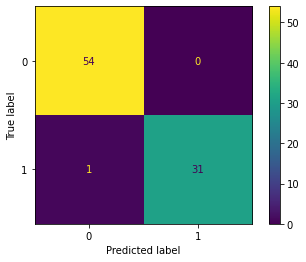

In [32]:
plot_confusion_matrix(log_model,X_test_scaled,y_test);

In [33]:
y_pred = log_model.predict(X_test_scaled)

In [34]:
Scores = {'Accuracy':round(accuracy_score(y_test,y_pred),3),'F1_score':round(f1_score(y_test,y_pred),3),'Recall':round(recall_score(y_test,y_pred),3),'Precision':round(precision_score(y_test,y_pred),3)}
Scores

{'Accuracy': 0.988, 'F1_score': 0.984, 'Recall': 0.969, 'Precision': 1.0}

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        54
           1       1.00      0.97      0.98        32

    accuracy                           0.99        86
   macro avg       0.99      0.98      0.99        86
weighted avg       0.99      0.99      0.99        86



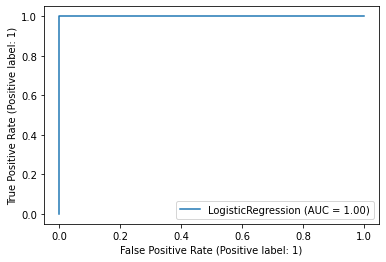

In [41]:
plot_roc_curve(log_model,X_test_scaled,y_test);

In [37]:
df_log_model=pd.DataFrame(data=Scores,index=['logistic_regression'])

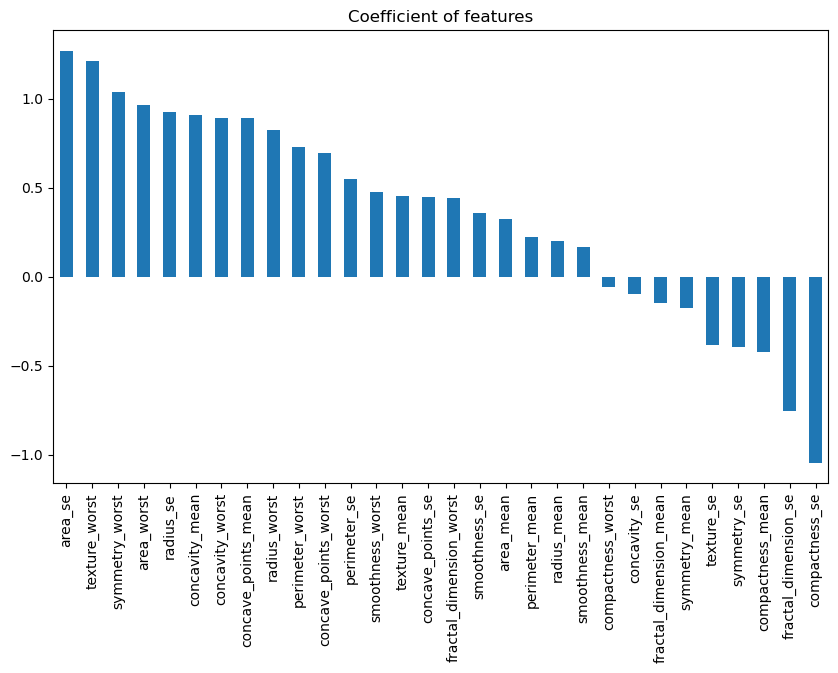

In [39]:
plt.figure(figsize=(10,6),dpi=100)
pd.Series(index=X.columns,data=log_model.coef_[0]).sort_values(ascending=False).plot(kind='bar')
plt.title('Coefficient of features');

area_se is having the highest coefficient.

# Random forest classifier

In [42]:
rf_model = RandomForestClassifier()

In [43]:
rf_model.fit(X_test_scaled,y_test)

RandomForestClassifier()

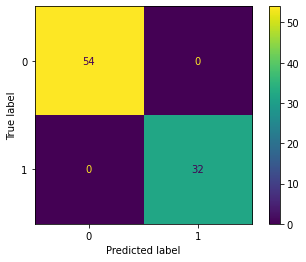

In [44]:
plot_confusion_matrix(rf_model,X_test_scaled,y_test)

No False positives and False negatives from the above matrix

In [45]:
y_pred = rf_model.predict(X_test_scaled)

In [46]:
Scores = {'Accuracy':round(accuracy_score(y_test,y_pred),3),'F1_score':round(f1_score(y_test,y_pred),3),'Recall':round(recall_score(y_test,y_pred),3),'Precision':round(precision_score(y_test,y_pred),3)}
Scores

{'Accuracy': 1.0, 'F1_score': 1.0, 'Recall': 1.0, 'Precision': 1.0}

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        32

    accuracy                           1.00        86
   macro avg       1.00      1.00      1.00        86
weighted avg       1.00      1.00      1.00        86



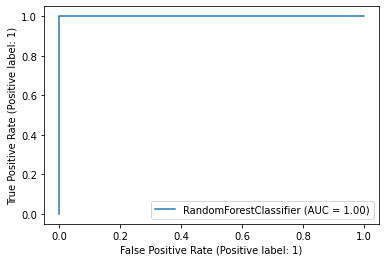

In [48]:
plot_roc_curve(rf_model,X_test_scaled,y_test);

In [49]:
df_rf_model=pd.DataFrame(data=Scores,index=['Random_forest'])

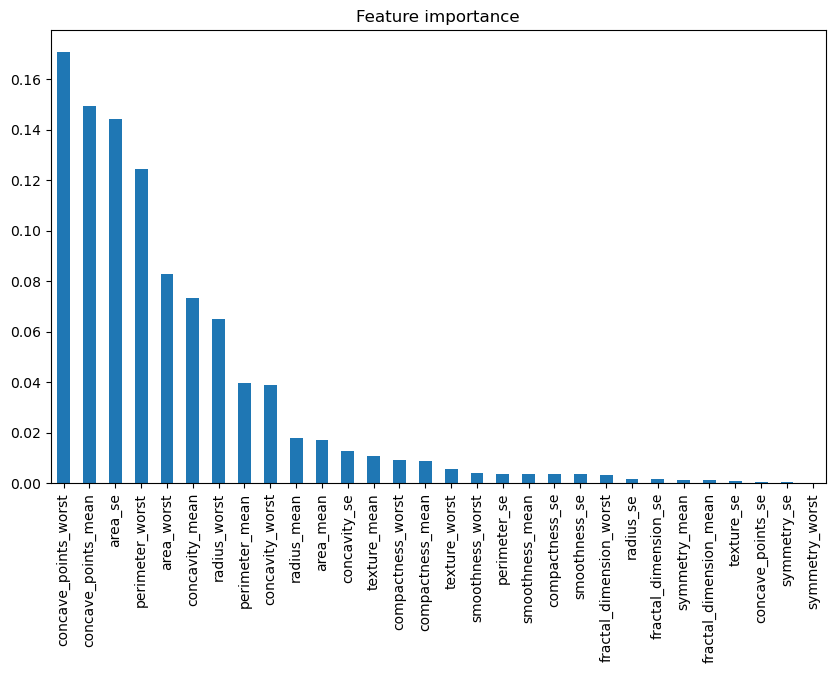

In [50]:
plt.figure(figsize=(10,6),dpi=100)
pd.Series(index=X.columns,data = rf_model.feature_importances_).sort_values(ascending=False).plot(kind='bar')
plt.title('Feature importance');

perimeter_worst is having the highest feature importance

# Summary

In [52]:
df_final = pd.concat([df_log_model,df_rf_model])

In [53]:
df_final

,Accuracy,F1_score,Recall,Precision
logistic_regression,0.988,0.984,0.969,1.0
Random_forest,1.000,1.000,1.000,1.0


From the above scores, Random forest classifier has performed better than the logistic regression model.

**Thank you!**